### METODE FUZZY TSUKAMOTO
**Kasus Studi: Penentuan Prioritas Pasien di Rumah Sakit**

**Tujuan:**

Menentukan tingkat prioritas pasien (Priority) berdasarkan:
*   Suhu tubuh (Temperature)
*   Denyut nadi (Pulse)

Variabel & Himpunan Fuzzy Aturan Fuzzy (Rules)
1. Jika Suhu Normal DAN Nadi Normal → Prioritas Rendah
2. Jika Suhu Tinggi ATAU Nadi Cepat → Prioritas Tinggi
Input Contoh → Prioritas yang mana ?
• Suhu pasien = 38.0°C
• Denyut nadi = 110 bpm

## **METODE FUZZY TSUKAMOTO**

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 18.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [ ]:
# 1 Domain variabel
x_temp = np.arange(35, 41, 0.1)
x_pulse = np.arange(60, 141, 1)
x_priority = np.arange(0, 101, 1)

In [ ]:
#2 Fungsi keanggotaan
temp_normal = fuzz.trimf(x_temp, [35, 36.5, 38])
temp_high = fuzz.trimf(x_temp, [37, 38.5, 40])

pulse_normal = fuzz.trimf(x_pulse, [60, 80, 100])
pulse_fast = fuzz.trimf(x_pulse, [90, 115, 140])

# Output: monoton (sesuai Tsukamoto)
priority_low = fuzz.trimf(x_priority, [0, 0, 50])
priority_med = fuzz.trimf(x_priority, [25, 50, 75])
priority_high = fuzz.trimf(x_priority, [50, 100, 100])

In [ ]:
# 3 Input pasien
temp_in = 38.0
pulse_in = 110

In [ ]:
# Fuzzifikasi
μ_temp_normal = fuzz.interp_membership(x_temp, temp_normal, temp_in)
μ_temp_high = fuzz.interp_membership (x_temp, temp_high, temp_in)
μ_pulse_normal = fuzz.interp_membership (x_pulse, pulse_normal, pulse_in)
μ_pulse_fast = fuzz.interp_membership (x_pulse, pulse_fast, pulse_in)

print (f"Derajat keanggotaan suhu: Normal={μ_temp_normal:.2f}, Tinggi={μ_temp_high:.2f}")
print (f"Derajat keanggotaan nadi: Normal={μ_pulse_normal:.2f}, Cepat={μ_pulse_fast: .2f}")

Derajat keanggotaan suhu: Normal=0.00, Tinggi=0.67
Derajat keanggotaan nadi: Normal=0.00, Cepat= 0.80


In [ ]:
# 5 Rule evaluation
# Rule 1: Jika suhu normal dan nadi normal prioritas rendah
alpha1 = min(μ_temp_normal, μ_pulse_normal)
# Rule 2: Jika suhu tinggi atau nadi cepat → prioritas tinggi
alpha2 = max(μ_temp_high, μ_pulse_fast)


# Fungsi monotonik kita cari nilai prioritas (z) dari a
z1 = 50* (1 - alpha1) # Prioritas rendah (menurun)
z2 = 50 + 50 * alpha2 # Prioritas tinggi (meningkat)

# Defuzzifikasi (rata-rata terbobot)
z = (alpha1 * z1 + alpha2 * z2) / (alpha1 + alpha2)

print("\n=== Hasil inferensi Tsukamoto ===")
print (f"a1={alpha1:.2f}, z1={z1:.2f}")
print (f"a2={alpha2:.2f}, z2={z2:.2f}")

print (f"Output (z*) = {z:.2f}")


=== Hasil inferensi Tsukamoto ===
a1=0.00, z1=50.00
a2=0.80, z2=90.00
Output (z*) = 90.00


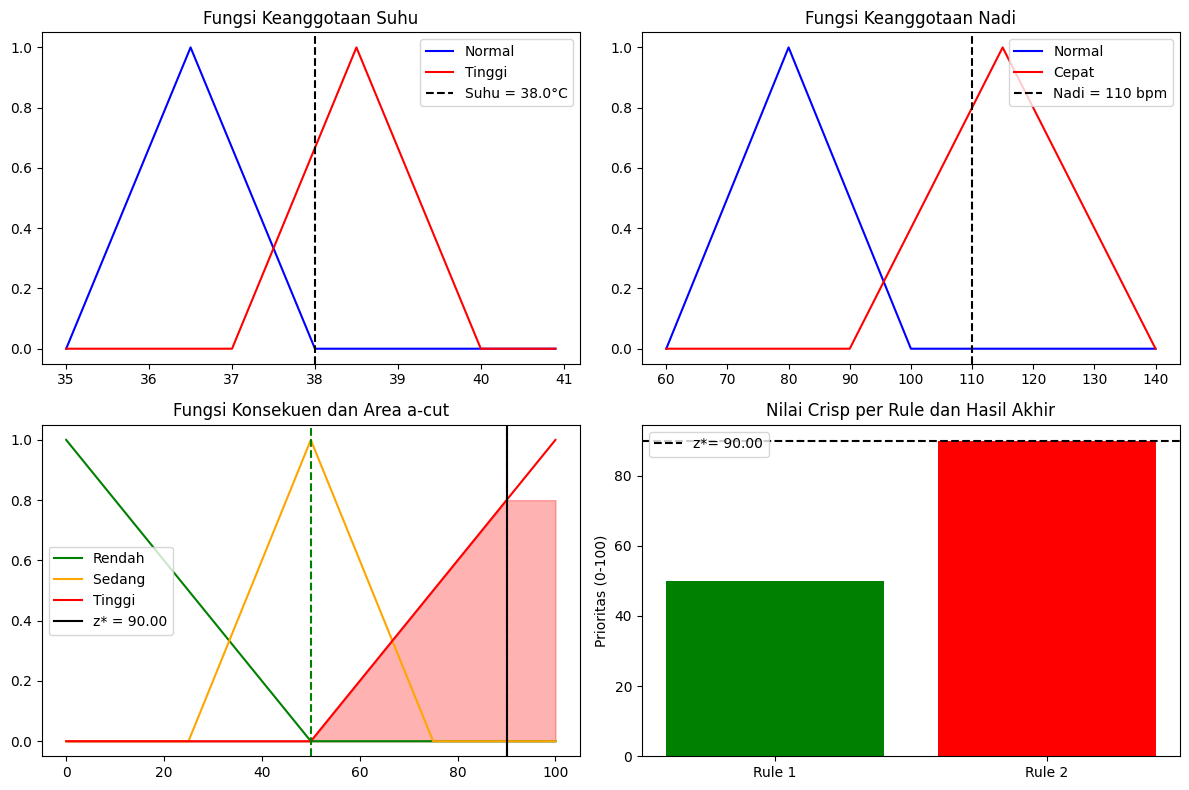

In [ ]:
# 6 Visualisasi
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Suhu
axs[0,0].plot(x_temp, temp_normal, 'b', label='Normal')
axs[0,0].plot(x_temp, temp_high, 'r', label='Tinggi')
axs[0,0].axvline (temp_in, color='k', linestyle= '--', label=f'Suhu = {temp_in}°C')
axs[0,0].set_title('Fungsi Keanggotaan Suhu')
axs[0,0].legend()

# Nadi
axs[0,1].plot(x_pulse, pulse_normal, 'b', label='Normal')
axs[0,1].plot(x_pulse, pulse_fast, 'r', label='Cepat')
axs[0,1].axvline (pulse_in, color='k', linestyle= '--', label=f'Nadi = {pulse_in} bpm')
axs[0,1].set_title('Fungsi Keanggotaan Nadi')
axs[0,1].legend()

# Output Prioritas (konsekuen)
axs[1,0].plot(x_priority, priority_low, 'g', label='Rendah')
axs[1,0].plot(x_priority, priority_med, 'orange', label='Sedang ')
axs[1,0].plot(x_priority, priority_high, 'r', label='Tinggi')

# Plot a-cut area (clipped)
axs[1,0].fill_between (x_priority, 0, np.fmin (alpha1, priority_low), color='g', alpha=0.3)
axs[1,0].fill_between (x_priority, 0, np. fmin (alpha2, priority_high), color='r', alpha=0.3)


axs[1,0].axvline (z1, color='g', linestyle='--')
axs[1,0].axvline (z2, color='r', linestyle='--')

axs[1,0].axvline (z, color='k', linestyle='-', label=f'z* = {z:.2f}')

axs[1,0].set_title('Fungsi Konsekuen dan Area a-cut')
axs[1,0].legend()

# Visualisasi hasil defuzzifikasi
axs[1,1].bar(['Rule 1', 'Rule 2'], [z1,z2], color=['g', 'r'])
axs[1,1].axhline (z, color='k', linestyle='--', label=f'z*={z: .2f}')
axs[1,1].set_ylabel('Prioritas (0-100)')
axs[1,1].set_title('Nilai Crisp per Rule dan Hasil Akhir')
axs[1,1].legend()

plt.tight_layout()
plt.show()